# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | First time flying British Ai...
1,Not Verified | I flew London to Cairo and ret...
2,Not Verified | Absolutely the worst experienc...
3,Not Verified | Flew back from Malta after sc...
4,Not Verified | Cabin luggage had to go to carg...


In [4]:
df.to_csv("E:/Data Analysis/Projects/British Airways/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df_new =pd.read_csv("BA_reviews.csv")
df_new.head(10)

,Unnamed: 0,reviews
0,0,✅ Trip Verified | First time flying British Ai...
1,1,Not Verified | I flew London to Cairo and ret...
2,2,Not Verified | Absolutely the worst experienc...
3,3,Not Verified | Flew back from Malta after sc...
4,4,Not Verified | Cabin luggage had to go to carg...
5,5,✅ Trip Verified | I have been using BA for a ...
6,6,✅ Trip Verified | I flew from Istanbul to Lo...
7,7,Not Verified | I have flow on BA several time...
8,8,✅ Trip Verified | The flight departed over a...
9,9,✅ Trip Verified | I hate British Airways! We...


In [6]:
# Spliting the column by deimeter.

splited_df = df['reviews'].str.split("|",n=1,expand=True)
splited_df

,0,1
0,✅ Trip Verified,First time flying British Airways and I would...
1,Not Verified,I flew London to Cairo and return in October...
2,Not Verified,Absolutely the worst experience ever. Flew ...
3,Not Verified,Flew back from Malta after scattering our s...
4,Not Verified,"Cabin luggage had to go to cargo, even when I..."
...,...,...
995,✅ Trip Verified,London to Johannesburg. So impressed by the ...
996,✅ Trip Verified,Newark to Bangalore return via London on BA ...
997,✅ Trip Verified,London to Berlin scheduled for 21st December...
998,✅ Trip Verified,London to Mumbai. I have had my battles with...


In [7]:
# Dropping the unnecessary column

splited_df = splited_df.drop(splited_df.columns[0],axis=1)
splited_df

,1
0,First time flying British Airways and I would...
1,I flew London to Cairo and return in October...
2,Absolutely the worst experience ever. Flew ...
3,Flew back from Malta after scattering our s...
4,"Cabin luggage had to go to cargo, even when I..."
...,...
995,London to Johannesburg. So impressed by the ...
996,Newark to Bangalore return via London on BA ...
997,London to Berlin scheduled for 21st December...
998,London to Mumbai. I have had my battles with...


In [8]:
df = splited_df
df

,1
0,First time flying British Airways and I would...
1,I flew London to Cairo and return in October...
2,Absolutely the worst experience ever. Flew ...
3,Flew back from Malta after scattering our s...
4,"Cabin luggage had to go to cargo, even when I..."
...,...
995,London to Johannesburg. So impressed by the ...
996,Newark to Bangalore return via London on BA ...
997,London to Berlin scheduled for 21st December...
998,London to Mumbai. I have had my battles with...


In [9]:
# Renaming the splited columns as Reviews

df = df.rename(columns={df.columns[0]: 'Reviews'})
df

,Reviews
0,First time flying British Airways and I would...
1,I flew London to Cairo and return in October...
2,Absolutely the worst experience ever. Flew ...
3,Flew back from Malta after scattering our s...
4,"Cabin luggage had to go to cargo, even when I..."
...,...
995,London to Johannesburg. So impressed by the ...
996,Newark to Bangalore return via London on BA ...
997,London to Berlin scheduled for 21st December...
998,London to Mumbai. I have had my battles with...


In [10]:
df['Reviews'].head(25).str.len().to_list()

[231,
 798,
 1185,
 609,
 233,
 768,
 666,
 1107,
 782,
 514,
 1251,
 1424,
 1822,
 831,
 893,
 1156,
 856,
 465,
 276,
 356,
 844,
 2609,
 644,
 1102,
 483]

In [11]:
df['Reviews'].tail(25).str.len().to_list()

[462,
 221,
 607,
 1165,
 1298,
 550,
 796,
 546,
 1414,
 855,
 206,
 992,
 163,
 213,
 220,
 221,
 465,
 475,
 791,
 615,
 789,
 3167,
 1024,
 1033,
 709]

In [12]:
# Deriving last sentence from a Review. As, People normally tend to share overall experience in a last statement

df['reviews'] = df.Reviews.str.split(".",-1).str.get(-2)

In [13]:
df

,Reviews,reviews
0,First time flying British Airways and I would...,One of my better flights
1,I flew London to Cairo and return in October...,"However, overall I would still recommend BA a..."
2,Absolutely the worst experience ever. Flew ...,"Awful, bordering on passenger abuse"
3,Flew back from Malta after scattering our s...,A
4,"Cabin luggage had to go to cargo, even when I...",Luckily it was a short flight
...,...,...
995,London to Johannesburg. So impressed by the ...,When she gave us our boarding passes she ment...
996,Newark to Bangalore return via London on BA ...,Bit harder to justify on shorter flights or f...
997,London to Berlin scheduled for 21st December...,"After I arrived at my destination, a lengthy ..."
998,London to Mumbai. I have had my battles with...,Having been grumpy about several aspects of B...


In [14]:
df.drop(['Reviews'],axis=1,inplace=True)
df

,reviews
0,One of my better flights
1,"However, overall I would still recommend BA a..."
2,"Awful, bordering on passenger abuse"
3,A
4,Luckily it was a short flight
...,...
995,When she gave us our boarding passes she ment...
996,Bit harder to justify on shorter flights or f...
997,"After I arrived at my destination, a lengthy ..."
998,Having been grumpy about several aspects of B...


In [15]:
df.isnull().sum()

reviews    1
dtype: int64

In [16]:
df.head()

,reviews
0,One of my better flights
1,"However, overall I would still recommend BA a..."
2,"Awful, bordering on passenger abuse"
3,A
4,Luckily it was a short flight


In [17]:
df = df.dropna(axis=0)

In [18]:
df.isnull().sum()

reviews    0
dtype: int64

In [19]:
df = df[df['reviews'].str.len() >= 5]

In [20]:
df

,reviews
0,One of my better flights
1,"However, overall I would still recommend BA a..."
2,"Awful, bordering on passenger abuse"
4,Luckily it was a short flight
5,"But if you are flying to/from UK directly, th..."
...,...
995,When she gave us our boarding passes she ment...
996,Bit harder to justify on shorter flights or f...
997,"After I arrived at my destination, a lengthy ..."
998,Having been grumpy about several aspects of B...


In [21]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [22]:
#Sentiment Check

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()

In [23]:
df['polarity']=[analyzer.polarity_scores(text)['compound'] for text in df.reviews]

def get_sentiment(polarity):
    if polarity < 0.0:
        return 'Negative'
    elif polarity > 0.2:
        return 'Positive'
    else:
        return 'Neutral'
    
df['sentiment']=df.polarity.apply(get_sentiment)


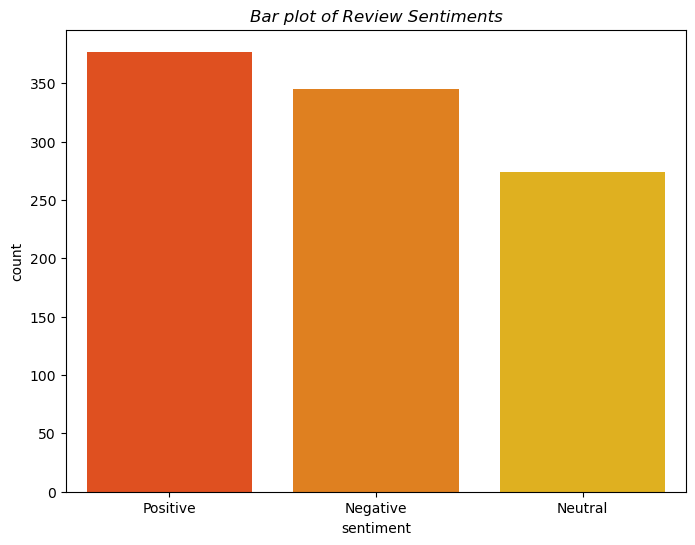

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
plt.title("Bar plot of Review Sentiments",fontstyle='italic')
plt.xlabel("Sentiments")
sns.countplot(x=df.sentiment,data=df,palette="autumn")
plt.show()

In [25]:
df.sentiment.value_counts()

Positive    377
Negative    345
Neutral     274
Name: sentiment, dtype: int64